In [1]:
import numpy as np
import pandas as pd


In [4]:
train = pd.read_csv('valid.csv')
test = pd.read_csv('output3.csv')

In [27]:
train.head()
test.head()
# c = df2[df2.ID.isin(df1.ID)]
# c.head()

,ID,Class
3982,999.jpg,YOUNG
3981,996.jpg,YOUNG
3980,99.jpg,MIDDLE
3979,988.jpg,OLD
3978,980.jpg,YOUNG


In [7]:
train = train.sort_values('ID', ascending = False)
train.head()

,ID,Class
641,999.jpg,YOUNG
3235,996.jpg,YOUNG
2291,99.jpg,YOUNG
3195,988.jpg,YOUNG
2619,980.jpg,YOUNG


In [11]:
test = test.sort_values('ID', ascending = False)
test.head()


,ID,Class
3984,IMG_20190327_223348758.jpg,YOUNG
3983,IMG-20190327-WA0007.jpg,OLD
3982,999.jpg,YOUNG
3981,996.jpg,YOUNG
3980,99.jpg,MIDDLE


In [12]:
test.drop(test.index[[0,1]], inplace=True)
test.head()

,ID,Class
3982,999.jpg,YOUNG
3981,996.jpg,YOUNG
3980,99.jpg,MIDDLE
3979,988.jpg,OLD
3978,980.jpg,YOUNG


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = train.Class
y_pred = test.Class

classes=['YOUNG', 'MIDDLE', 'OLD']

confusion_matrix(y_true, y_pred, labels=['YOUNG', 'MIDDLE', 'OLD'])




array([[1052,  260,   30],
       [ 218, 1850,   93],
       [  48,  137,  295]], dtype=int64)

In [25]:
classification_report(y_true, y_pred)

'              precision    recall  f1-score   support\n\n      MIDDLE       0.82      0.86      0.84      2161\n         OLD       0.71      0.61      0.66       480\n       YOUNG       0.80      0.78      0.79      1342\n\n   micro avg       0.80      0.80      0.80      3983\n   macro avg       0.78      0.75      0.76      3983\nweighted avg       0.80      0.80      0.80      3983\n'

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    

Confusion matrix, without normalization
[[1052  260   30]
 [ 218 1850   93]
 [  48  137  295]]


NameError: name 'itertools' is not defined

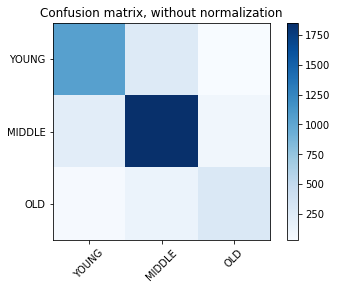

In [22]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=['YOUNG', 'MIDDLE', 'OLD'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['YOUNG', 'MIDDLE', 'OLD'],
                      title='Confusion matrix, without normalization')